<a href="https://colab.research.google.com/github/sankarsh777/GDSC-AIML-SANKARSH-B241162ME/blob/main/intermediate_question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image\


In [40]:
# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizing
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshaping for CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# One-hot encoding the things
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [41]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),#this layer learns things
    MaxPooling2D((2,2)),#this layer keeps strongest feature

    Conv2D(64, (3,3), activation="relu"),#repeat for grouping higher features
    MaxPooling2D((2,2)),

    Flatten(),#make it one vector
    Dense(128, activation="relu"),#provides activations for classifiyn
    Dense(10, activation="softmax")#actual classifications as probabilities
])
#7 layer model without counting input

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [43]:
model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)



Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 100ms/step - accuracy: 0.8382 - loss: 0.5144 - val_accuracy: 0.9818 - val_loss: 0.0658
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9794 - loss: 0.0660 - val_accuracy: 0.9863 - val_loss: 0.0471
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9858 - loss: 0.0464 - val_accuracy: 0.9835 - val_loss: 0.0599
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9894 - loss: 0.0341 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9882 - val_loss: 0.0424


In [44]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9843 - loss: 0.0513
Test accuracy: 0.9871000051498413


In [45]:

def load_external_image(path):#final task of question
    img = Image.open(path).convert("L")
    img = img.resize((28,28))
    img = np.array(img)

    img = 255 - img        # invert cos the input colours are opposite to training causes huge errors
    img = img / 255.0      # normalize
    img = img.reshape(1,28,28,1)

    return img


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted digit: 1


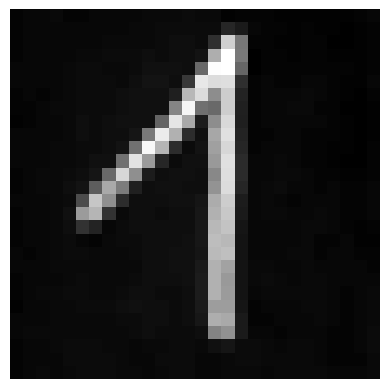

In [47]:
img = load_external_image("/content/final.jpg")

prediction = model.predict(img)
digit = np.argmax(prediction)

print("Predicted digit:", digit)

plt.imshow(img[0,:,:,0], cmap="gray")
plt.axis("off")
plt.show()
